# Project Titanic - Machine Learning from Disaster

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
data_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data_df.set_index(data_df.PassengerId, inplace= True)

In [12]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data_df.drop("PassengerId", axis= True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [16]:
data_df.columns = data_df.columns.str.strip()
data_df["Survived"] = data_df["Survived"].astype("category")

In [17]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 84.5+ KB


In [18]:
list_chuyen_doi = [" Pclass", "Sex ", "SibSp", " Parch ", " Embarked"]

In [19]:
# Xóa khoảng trắng trong tên cột của DataFrame
data_df.columns = data_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Danh sách cột cần chuyển kiểu, làm sạch khoảng trắng
list_chuyen_doi = [" Pclass", "Sex ", "SibSp", " Parch ", " Embarked"]
list_chuyen_doi = [col.strip() for col in list_chuyen_doi]

# Hàm chuyển đổi kiểu
def chuyen_doi(data_df, list_chuyen_doi):
    for list_chuyen in list_chuyen_doi:
        data_df[list_chuyen] = data_df[list_chuyen].astype("category")

# Gọi hàm cho cả hai DataFrame
chuyen_doi(data_df, list_chuyen_doi)
chuyen_doi(test_df, list_chuyen_doi)


In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 55.1+ KB


In [21]:
data_df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [22]:
data_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## Dũng Data Analyst Train dữ liệu 


In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 55.1+ KB


In [24]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 22.8+ KB


## EDA 

### Target : Survied

In [25]:
data_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [26]:
data_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
data_df["Survived"].value_counts(normalize=True).to_frame() # tinh theo ti le phan tram song sot cua hnah khach

,proportion
Survived,
0,0.616162
1,0.383838


## Sex


In [28]:
data_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [29]:
data_df['Sex'] = data_df['Sex'].astype(str)
data_df['Sex'] = data_df['Sex'].str.lower()
data_df['Sex'] = data_df['Sex'].map({'male': 0, 'female': 1})
data_df['Sex'] = data_df['Sex'].fillna(0).astype(int)

In [30]:
print(data_df['Sex'].unique())


[0 1]


In [31]:
print(data_df['Sex'].dtype)        # kiểm tra kiểu dữ liệu
print(data_df['Sex'].value_counts())  # kiểm tra tần suất các giá trị
print(data_df['Sex'].unique())     # kiểm tra giá trị duy nhất


int64
Sex
0    577
1    314
Name: count, dtype: int64
[0 1]


In [32]:
data_df['Sex'].head(100)

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
96     0
97     0
98     0
99     1
100    0
Name: Sex, Length: 100, dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: xlabel='Sex', ylabel='count'>

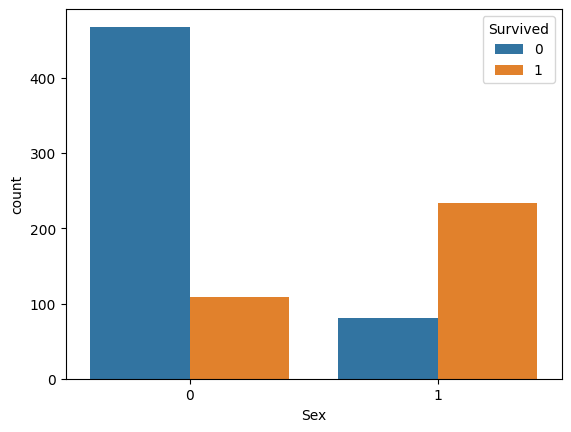

In [34]:
sns.countplot(data= data_df, x = "Sex", hue="Survived")

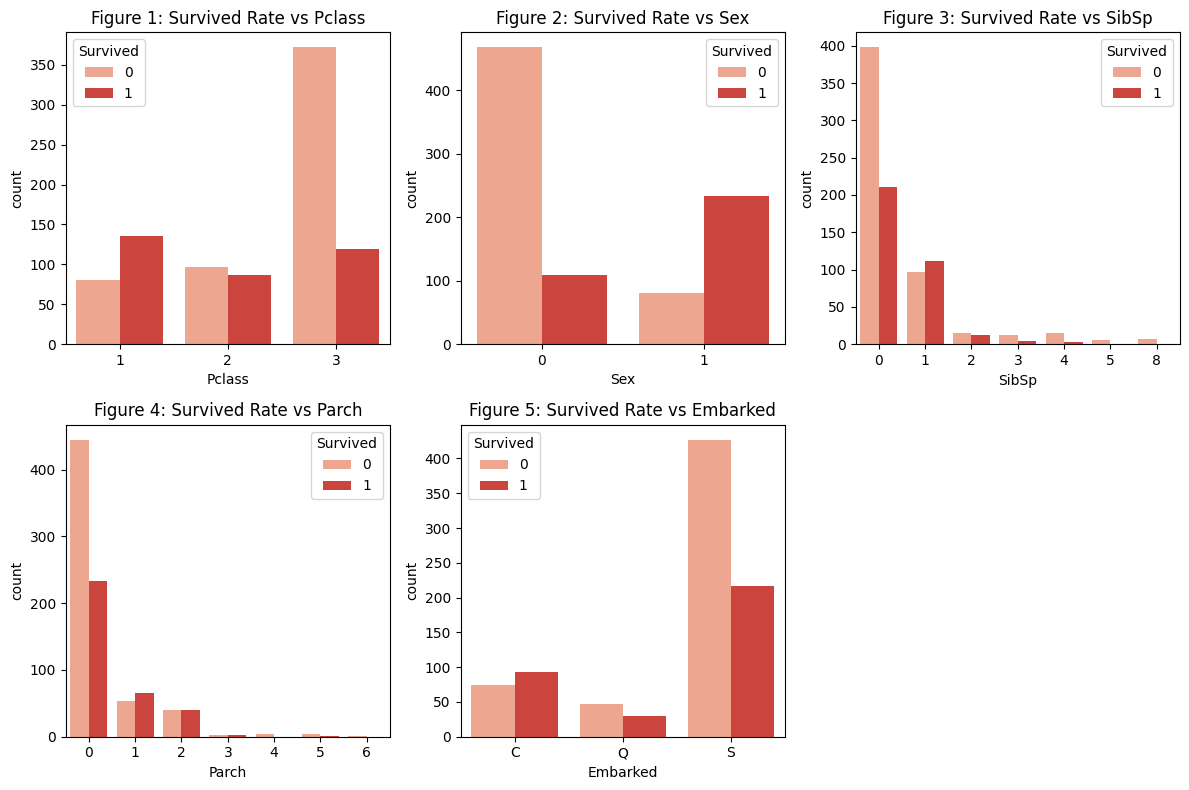

In [ ]:

cols = [" Pclass", "Sex ", "SibSp", " Parch ", " Embarked"]
cols = [col.strip() for col in cols]

n_rows = 2  # số hàng
r_cols = 3  # số cột

# Tạo lưới biểu đồ
fig, ax = plt.subplots(n_rows, r_cols, figsize=(r_cols * 4, n_rows * 4))

# Vẽ biểu đồfor n in range(n_rows):
    for r in range(r_cols):
        i = n * r_cols + r  # chỉ số cột đang vẽ
        if i < len(cols):
            ax_i = ax[n, r]
            sns.countplot(data=data_df, x=cols[i], hue="Survived", palette="Reds", ax=ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survived Rate vs {cols[i]}")
            ax_i.legend(title="Survived")
        else:
            # Ẩn ô trống nếu không có cột tương ứng
            ax[n, r].axis('off')

plt.tight_layout()
plt.show()



<Axes: xlabel='Age', ylabel='Count'>

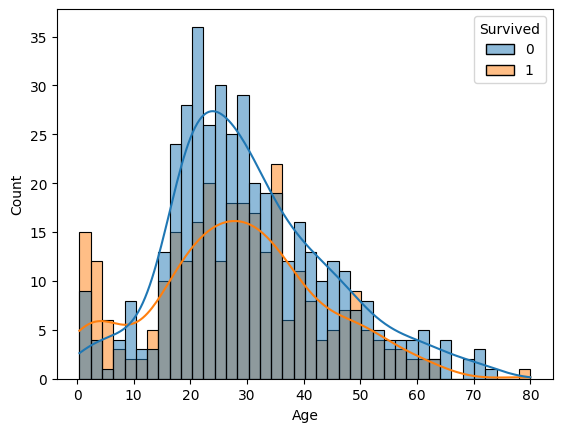

In [36]:
sns.histplot(data= data_df , x = "Age", hue = "Survived", bins = 40, kde= True)

In [37]:
data_df["Fare"].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

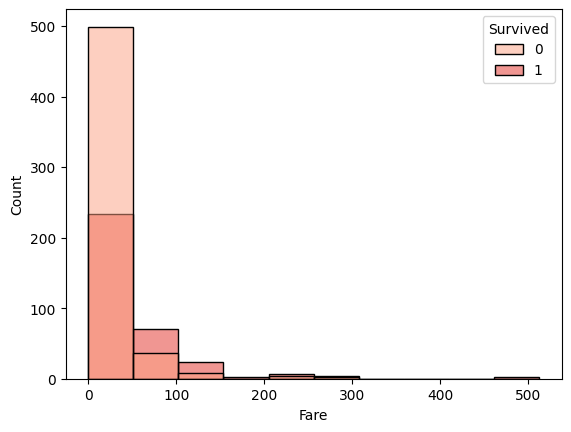

In [38]:
sns.histplot(data = data_df, x = "Fare",  bins = 10 , hue = "Survived", palette= "Reds")

In [39]:
pd.qcut(data_df["Fare"], 4 )

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [40]:
data_df["Fare"]


PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

### Feture Engineerning & Data Wrangling


In [41]:
data_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

## Feature Engineering & Data Wrangling 


In [42]:
data_df['Name'].head()
data_df['Name'].tail(20)


PassengerId
872    Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
873                            Carlsson, Mr. Frans Olof
874                         Vander Cruyssen, Mr. Victor
875               Abelson, Mrs. Samuel (Hannah Wizosky)
876                    Najib, Miss. Adele Kiamie "Jane"
877                       Gustafsson, Mr. Alfred Ossian
878                                Petroff, Mr. Nedelio
879                                  Laleff, Mr. Kristo
880       Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
881        Shelley, Mrs. William (Imanita Parrish Hall)
882                                  Markun, Mr. Johann
883                        Dahlberg, Miss. Gerda Ulrika
884                       Banfield, Mr. Frederick James
885                              Sutehall, Mr. Henry Jr
886                Rice, Mrs. William (Margaret Norton)
887                               Montvila, Rev. Juozas
888                        Graham, Miss. Margaret Edith
889            Johnston, Miss. Cathe

In [43]:
import re 

def lay_title(name):
    p = re.compile(r",([\w\s]+)\.")
    if name is None:
        print(name)
    return p.search(name).group(1).strip()

data_df['title'] = data_df['Name'].apply(lambda name: lay_title(name))
test_df['title'] = test_df['Name'].apply(lambda name: lay_title(name))

In [44]:
data_df['title'].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [45]:
# don tat ca cac ho co ki tu it vao 1 chung 1 ho other 
def groups_title(title):
    if title in ["Mr", "Miss", "Mrs", "Master", "Dr"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
data_df["title"].apply(lambda title : groups_title(title))
test_df['title'].apply(lambda title : groups_title(title))

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414    Others
415        Mr
416        Mr
417    Master
Name: title, Length: 418, dtype: object

In [46]:
data_df["title"].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [47]:
test_df['title'].value_counts()

title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

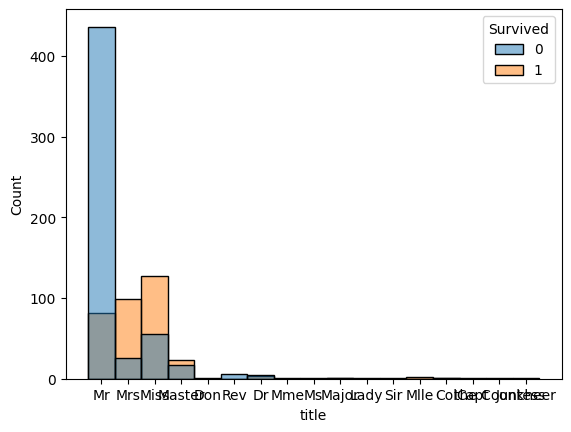

In [48]:
sns.histplot(data=data_df, x = 'title', hue= 'Survived');

## So luong anh chi em di voi nhau Sibps 


In [49]:
data_df['Family_size'] = data_df["SibSp"].astype('int') + data_df["Parch"].astype('int') +1 

In [50]:
test_df['Family_size'] = test_df["SibSp"].astype('int') + test_df["Parch"].astype('int') +1 

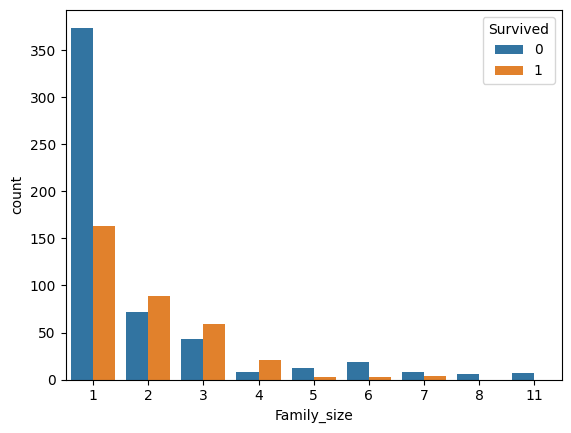

In [51]:
sns.countplot(data = data_df, x = "Family_size", hue = "Survived");

In [52]:
pd.cut(data_df["Family_size"], bins=[0, 1, 4, 6, 20], labels=['solo', 'small', 'medium', 'large'], right=True)


PassengerId
1      small
2      small
3       solo
4      small
5       solo
       ...  
887     solo
888     solo
889    small
890     solo
891     solo
Name: Family_size, Length: 891, dtype: category
Categories (4, object): ['solo' < 'small' < 'medium' < 'large']

## Data Wrangling

In [53]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'title', 'Family_size']

In [54]:
features_sum = num_features + cat_features
print(features_sum)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'title', 'Family_size']


In [55]:
# ham kiem tar missing_values 
def kiem_tra(df, features_sum):
    n_rows = df.shape[0]
    for col in cat_features:
        count = df[col].isnull().sum()
        if count > 0:
            print(f"{col} has {count} % missing_value")
kiem_tra(data_df, features_sum)            

Embarked has 2 % missing_value


In [56]:
apply_by_sex_pclass = data_df.groupby(['Sex', 'Pclass'])['Age'].median()
apply_by_sex_pclass = test_df.groupby((['Sex', 'Pclass'])['Age'].median()

SyntaxError: incomplete input (1925181307.py, line 2)

In [57]:
data_df['Age'] = data_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], observed=False)['Age'].transform(lambda x: x.fillna(x.median()))


# 

In [58]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Family_size
PassengerId,,,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
3,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,2
5,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [59]:
x = data_df['Cabin']
print(x)

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object


In [60]:
x = data_df[features_sum ]
y = data_df['Survived']

In [70]:
x_test = test_df[features_sum]

In [71]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [72]:
num_tranfrommer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_tranfrommer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('encoder', OneHotEncoder(handle_unknown="ignore"))                     
])

In [73]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', num_tranfrommer, num_features),
    ('cat', cat_tranfrommer, cat_features)
])


In [74]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'title',
                                  'Family_size'])])

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\TRAN ANH DUNG\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [76]:
conn = mysql.connector.connect(
    host="localhost",      
    user="root", 
    password="",
    database="base"
)

NameError: name 'mysql' is not defined

In [77]:
import csv
import mysql.connector

# 1. Kết nối đến database MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="base"
)
cursor = conn.cursor()

# 2. Đọc file CSV
csv_file_path = "train.csv"
with open(csv_file_path, mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Lấy tiêu đề cột từ dòng đầu tiên
    
    # 3. Tạo câu lệnh tạo bảng
    table_name = "train"
    columns = ", ".join([f"`{header}` TEXT" for header in headers])
    create_table_query = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})"
    cursor.execute(create_table_query)

    # 4. Chèn từng dòng dữ liệu
    insert_query = f"INSERT INTO `{table_name}` ({', '.join(headers)}) VALUES ({', '.join(['%s'] * len(headers))})"
    
    for row in reader:
        if any(row):  # Bỏ qua dòng rỗng
            cursor.execute(insert_query, row)

# 5. Lưu và đóng kết nối
conn.commit()
cursor.close()
conn.close()

print("✅ Import CSV vào MySQL thành công!")


DatabaseError: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)

In [80]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# Xác định cột số và phân loại
numeric_cols = ['Age', 'Fare', 'Family_size']
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'title']

# Xử lý giá trị thiếu
# Cột số: điền bằng mean của x_train
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())
x_test['Age'] = x_test['Age'].fillna(x_train['Age'].mean())
x_val['Age'] = x_val['Age'].fillna(x_train['Age'].mean())
x_train['Fare'] = x_train['Fare'].fillna(x_train['Fare'].mean())
x_test['Fare'] = x_test['Fare'].fillna(x_train['Fare'].mean())
x_val['Fare'] = x_val['Fare'].fillna(x_train['Fare'].mean())

# Cột phân loại: điền bằng mode của chính tập dữ liệu hoặc đảm bảo giá trị hợp lệ
for col in ['Sex', 'Pclass', 'Embarked', 'title']:
    # Điền giá trị thiếu trong x_train
    x_train[col] = x_train[col].fillna(x_train[col].mode()[0])
    # Điền giá trị thiếu trong x_test và x_val bằng mode của x_train
    mode_value = x_train[col].mode()[0]
    # Đảm bảo mode_value thuộc categories của x_test và x_val
    if col in x_test and mode_value in x_test[col].cat.categories:
        x_test[col] = x_test[col].fillna(mode_value)
    else:
        x_test[col] = x_test[col].fillna(x_test[col].mode()[0])
    if col in x_val and mode_value in x_val[col].cat.categories:
        x_val[col] = x_val[col].fillna(mode_value)
    else:
        x_val[col] = x_val[col].fillna(x_val[col].mode()[0])

# Tạo preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ])

# Tạo pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
])

# Huấn luyện mô hình trên x_train
pipeline.fit(x_train, y_train)

# Đánh giá trên x_val
score = pipeline.score(x_val, y_val)
print("Accuracy on validation set:", score)

C:\Users\TRAN ANH DUNG\AppData\Local\Temp\ipykernel_24456\706967636.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Age'] = x_test['Age'].fillna(x_train['Age'].mean())
C:\Users\TRAN ANH DUNG\AppData\Local\Temp\ipykernel_24456\706967636.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Fare'] = x_test['Fare'].fillna(x_train['Fare'].mean())
C:\Users\TRAN ANH DUNG\AppData\Local\Temp\ipykernel_24456\706967636.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

AttributeError: Can only use .cat accessor with a 'category' dtype

In [81]:
print(x_train.columns.tolist())


['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'title', 'Family_size']


In [ ]:
print(x_train.dtypes)  # Xem kiểu dữ liệu của từng cột
print(x_train.head())  # Xem 5 dòng đầu tiên để kiểm tra giá trị

## Buoc 5


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train , x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [144]:
x_train.shape
x_val.shape

(179, 7)

In [145]:
from sklearn.linear_model import LogisticRegression


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
# Giả sử x_train và x_test là DataFrame của bạn
# Mã hóa cột nhị phân 'Sex' bằng LabelEncoder
le = LabelEncoder()
x_train['Sex'] = le.fit_transform(x_train['Sex'])  # male -> 0, female -> 1
x_test['Sex'] = le.transform(x_test['Sex'])       # Áp dụng cùng ánh xạ cho x_test

# Mã hóa các cột phân loại khác bằng One-Hot Encoding
categorical_cols = ['Pclass', 'Embarked', 'title']
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Đồng bộ cột giữa x_train và x_test (đề phòng x_test có ít giá trị hơn)
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

# Kiểm tra dữ liệu sau khi mã hóa
print(x_train.dtypes)  # Đảm bảo tất cả cột đều là số (float64, int64, uint8)

# Huấn luyện mô hình
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [ ]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
print(x_val.columns)
print(x_val.head())
print(x_val.dtypes)

In [3]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

In [4]:
print("Giá trị trong Sex (x_val):", x_val['Sex'].unique())
print("Giá trị trong Sex (x_train):", x_train['Sex'].unique())

NameError: name 'x_val' is not defined

In [5]:
log_reg.fit(x_val, y_val)

NameError: name 'x_val' is not defined

In [161]:
log_reg.score(x_train, y_train)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.